# Image classification with TensorFlow Lite Model Maker
The TensorFlow Lite Model Maker library simplifies the process of training a TensorFlow Lite model using custom dataset. It uses transfer learning to reduce the amount of training data required and shorten the training time.

## Insatalling requisite libraries
In order to run a TF-Lite model, we first need to install several packages,
here's some details about how to install Model Maker package that in GitHub [click here](https://github.com/tensorflow/examples/tree/master/tensorflow_examples/lite/model_maker).

Here's a reference for how to use Model Maker [click here](https://www.tensorflow.org/lite/tutorials/model_maker_image_classification)

In [1]:
pip install -q tflite-model-maker

     |████████████████████████████████| 593kB 5.3MB/s 
     |████████████████████████████████| 215kB 10.8MB/s 
     |████████████████████████████████| 122kB 11.2MB/s 
     |████████████████████████████████| 92kB 6.8MB/s 
     |████████████████████████████████| 849kB 11.2MB/s 
     |████████████████████████████████| 645kB 20.3MB/s 
     |████████████████████████████████| 686kB 27.6MB/s 
     |████████████████████████████████| 71kB 7.5MB/s 
     |████████████████████████████████| 1.2MB 39.0MB/s 
     |████████████████████████████████| 6.3MB 44.5MB/s 
     |████████████████████████████████| 112kB 50.0MB/s 
     |████████████████████████████████| 1.1MB 45.2MB/s 
     |████████████████████████████████| 38.2MB 79kB/s 
     |████████████████████████████████| 358kB 39.6MB/s 
     |████████████████████████████████| 102kB 9.5MB/s 
     |████████████████████████████████| 194kB 35.1MB/s 


## Importing the packages

In [10]:
import numpy as np
import tensorflow as tf
assert tf.__version__.startswith('2')
import matplotlib.image as mpimg

from tflite_model_maker import model_spec
from tflite_model_maker import image_classifier
from tflite_model_maker.config import ExportFormat
from tflite_model_maker.config import QuantizationConfig
from tflite_model_maker.image_classifier import DataLoader
from tflite_model_maker.image_classifier import ModelSpec
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## EfficientNet-lite
EfficientNet-lite are a set of mobile/IoT friendly image classification models.
For more information about EfficientNet-lite and it's models can be found [here](https://github.com/tensorflow/tpu/tree/master/models/official/efficientnet/lite)
## EfficientNet-lite4


### Get the data path
The directory of the data with 18 classes which is given to the model to train is assigned to `data` varible.

In [12]:
data =  DataLoader.from_folder('/content/drive/MyDrive/apple')

INFO:tensorflow:Load image with size: 311, num_label: 3, labels: average, bad, good.


### Plotting 12 images from training data

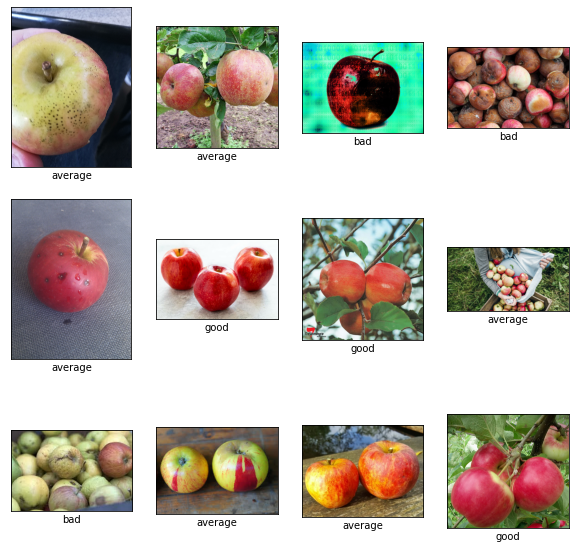

In [13]:
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(data.gen_dataset().unbatch().take(12)):
  plt.subplot(3,4,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)
  plt.xlabel(data.index_to_label[label.numpy()])
plt.show()

In [ ]:
test = DataLoader.from_folder('/content/drive/MyDrive/AI_Project/Internal Team 2 Data/Train/Test_Tomatoes')

In [ ]:
test, tmp = test.split(0.2)

### Creating the model
[`image_classifier.create()`](https://www.tensorflow.org/lite/api_docs/python/tflite_model_maker/image_classifier/create) uses efficientnet-lite0 as default model_spec.

In [ ]:
model = image_classifier.create(data, validation_data= test, model_spec= 'efficientnet_lite4', epochs =16, use_augmentation=True)

INFO:tensorflow:Retraining the models...


INFO:tensorflow:Retraining the models...


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2_1 (HubK (None, 1280)              11837936  
_________________________________________________________________
dropout_1 (Dropout)          (None, 1280)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 3843      
Total params: 11,841,779
Trainable params: 3,843
Non-trainable params: 11,837,936
_________________________________________________________________
None
INFO:tensorflow:Use default resize_bicubic.


INFO:tensorflow:Use default resize_bicubic.


INFO:tensorflow:Use customized resize method bilinear


INFO:tensorflow:Use customized resize method bilinear


INFO:tensorflow:Use customized resize method bilinear


INFO:tensorflow:Use customized resize method bilinear


Epoch 1/16


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


62/62 [==============================] - 25s 355ms/step - loss: 0.8224 - accuracy: 0.6623 - val_loss: 0.8932 - val_accuracy: 0.5938
Epoch 2/16
62/62 [==============================] - 20s 328ms/step - loss: 0.6342 - accuracy: 0.7913 - val_loss: 0.8280 - val_accuracy: 0.6562
Epoch 3/16
62/62 [==============================] - 20s 330ms/step - loss: 0.6230 - accuracy: 0.8080 - val_loss: 0.8182 - val_accuracy: 0.6562
Epoch 4/16
62/62 [==============================] - 20s 330ms/step - loss: 0.5917 - accuracy: 0.8276 - val_loss: 0.8286 - val_accuracy: 0.7188
Epoch 5/16
62/62 [==============================] - 20s 326ms/step - loss: 0.5885 - accuracy: 0.8337 - val_loss: 0.8171 - val_accuracy: 0.8125
Epoch 6/16
62/62 [==============================] - 20s 328ms/step - loss: 0.5865 - accuracy: 0.8281 - val_loss: 0.7725 - val_accuracy: 0.8438
Epoch 7/16
62/62 [==============================] - 20s 329ms/step - loss: 0.5752 - accuracy: 0.8347 - val_loss: 0.7799 - val_accuracy: 0.7500
Epoch 8/16

In [ ]:
eflite4 = model

### Exporting the model
Our model model can be exported with [metadata](https://www.tensorflow.org/lite/convert/metadata). which can be downloded and can be reused



In [ ]:
eflite4.export(export_dir='/content/drive/MyDrive/Untitled folder A/', export_format = ExportFormat.SAVED_MODEL)

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Untitled folder A/saved_model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Untitled folder A/saved_model/assets


In [ ]:
eflite4.export(export_dir='.')

INFO:tensorflow:Use customized resize method bilinear


INFO:tensorflow:Use customized resize method bilinear


INFO:tensorflow:Assets written to: /tmp/tmp5nrm1xp9/assets


INFO:tensorflow:Assets written to: /tmp/tmp5nrm1xp9/assets


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmp6q0nd31h/labels.txt


INFO:tensorflow:Saving labels in /tmp/tmp6q0nd31h/labels.txt


INFO:tensorflow:TensorFlow Lite model exported successfully: ./model.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully: ./model.tflite


In [ ]:
from google.colab import files
files.download('saved_model')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

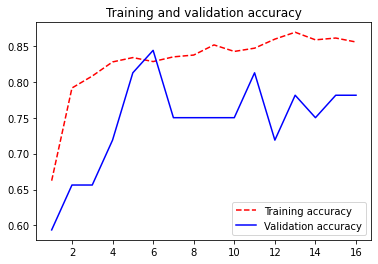

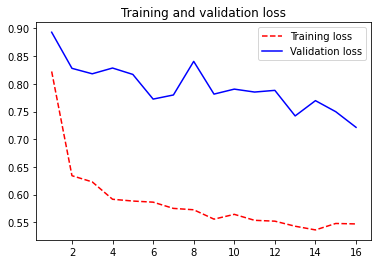

In [ ]:
  acc = eflite4.history.history['accuracy']
  val_acc = eflite4.history.history['val_accuracy']
  loss = eflite4.history.history['loss']
  val_loss = eflite4.history.history['val_loss']
  epochs = range(1, len(acc) + 1)
  plt.plot(epochs, acc, 'r--', label='Training accuracy')
  plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
  plt.title('Training and validation accuracy')
  plt.legend()
  plt.figure()
  plt.plot(epochs, loss, 'r--', label='Training loss')
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()
  plt.show()